# Testing Environment for Homework 1

In [1]:
# Global setup
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## 1. Implement Gradient Descent

 Implement a basic gradient descent procedure to minimize scalar functions of a vector argu- ment. Write it generically, so that you can easily specify the objective function and the function to compute the gradient. You should be able to specify the initial guess, the step size and the convergence criterion (a threshold such that the algorithm terminates when the difference in objective function value on two successive steps is below this threshold).

In [4]:
from gradient_descent import GradientDescent, quad, quadGrad

gd = GradientDescent(quad, quadGrad)
x = np.array([1.0, 1.0])

print gd.computeMin(x, useGradientCriterion=True)
print gd.stepSize

x_min is 
[  4.92043122e-05   4.92043122e-05]
f_min is 
4.84212866908e-09
achieved tolerance
9.84086243078e-05
numFunctionCalls
492
(array([  4.92043122e-05,   4.92043122e-05]), 4.8421286690780673e-09, 492, 0.0001)
0.01


##### Testing GradientDescent class

Plot default function stored as instance variable

<function quad at 0x10d72bcf8>
<function quadGrad at 0x10d730140>
4
2
(21,)
(21,)
Function in blue, derivative in red


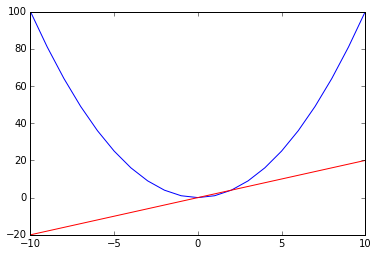

In [32]:
gd = GradientDescent(quad, quadGrad)

# Test functions are there
print gd.f
print gd.grad

# Test values for functions
print gd.f(2)
print gd.grad(1)

# Plot functions and overlay gradient
xaxis = np.linspace(-10,10,21)
yaxis_f = np.linspace(0,0,21)
yaxis_grad = np.linspace(0,0,21)

# Wish I could vectorize but this does not work
# yaxis_f = gd.f(xaxis)
# yaxis_grad = gd.grad(xaxis)

for i in range(len(xaxis)):
    yaxis_f[i] = gd.f(xaxis[i])
    yaxis_grad[i] = gd.grad(xaxis[i])
    
print xaxis.shape
print yaxis_f.shape

print 'Function in blue, derivative in red'
plt.plot(xaxis,yaxis_f, color ='blue')
plt.plot(xaxis,yaxis_grad, color='red')
plt.show()
